# **MNIST Classification using Neural Network**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading and processing data

In [2]:
(Xtr,ytr),(Xts,yts) = tf.keras.datasets.mnist.load_data()

Xtr = 2*(Xtr/255 - 0.5)
ntr, nrow, ncol = Xtr.shape
Xtr = Xtr.reshape((ntr,nrow*ncol))

Xts = 2*(Xts/255 - 0.5)
nts, nrow, ncol = Xts.shape
Xts = Xts.reshape((nts,nrow*ncol))

11493376/11490434 [==============================] - 0s 0us/step


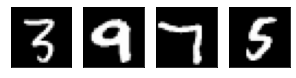

In [3]:
def plt_digit(ax, x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    ax.imshow(xsq,  cmap='Greys_r')
    ax.set_xticks([])
    ax.set_yticks([])
    
# Select random digits
nplt = 4
nsamp = Xtr.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
fig, ax = plt.subplots(1,nplt, figsize=(5,10))
for i in range(nplt):
    ind = Iperm[i]    
    plt_digit(ax[i], Xtr[ind,:])

Creating a simple Neural Network

In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()

In [5]:
nin = Xtr.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Training the network

In [7]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = model.fit(Xtr, ytr, epochs=30, batch_size=100, validation_data=(Xts,yts))

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.5116 - accuracy: 0.8702 - val_loss: 0.2817 - val_accuracy: 0.9223
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.2548 - accuracy: 0.9265 - val_loss: 0.2170 - val_accuracy: 0.9382
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1987 - accuracy: 0.9432 - val_loss: 0.1789 - val_accuracy: 0.9503
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1639 - accuracy: 0.9541 - val_loss: 0.1568 - val_accuracy: 0.9535
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1385 - accuracy: 0.9620 - val_loss: 0.1395 - val_accuracy: 0.9600
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1207 - accuracy: 0.9668 - val_loss: 0.1242 - val_accuracy: 0.9642
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1077 - accuracy: 0.9700 - val_loss: 0.1178 - val_accuracy: 0.9651
Epoch 

Plotting the training and validation accuracy

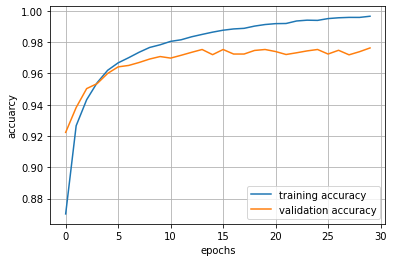

In [9]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

In [10]:
score, acc = model.evaluate(Xts, yts, verbose=1)

313/313 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9763


Saving the model

In [11]:
model.save("mnist_mod.h5")

Reloading the model

In [12]:
from tensorflow.keras.models import load_model

model1 = load_model("mnist_mod.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
z = model1.predict(Xts)
yhat = np.argmax(z,axis=1)

In [14]:
mat = np.column_stack((z,yhat))
with np.printoptions(precision=3, suppress=True):
    for i in range(5):
        print('z[%d,:]='%i, z[i,:], ', yhat[%d]= '%i, yhat[i])

z[0,:]= [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , yhat[0]=  7
z[1,:]= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] , yhat[1]=  2
z[2,:]= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] , yhat[2]=  1
z[3,:]= [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] , yhat[3]=  0
z[4,:]= [0.    0.    0.    0.    0.982 0.    0.    0.    0.    0.018] , yhat[4]=  4


In [15]:
acc = np.mean(yhat == yts)
print("accuracy = %f" % acc)

accuracy = 0.976300
